In [9]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.jpg"))
image_files_png = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
image_files.extend(image_files_png)
targets_orig = [x.split("/")[-1][:-4] for x in image_files]
# abcde -> [a, b, c, d, e]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets = np.array(targets_enc) + 1
# print(np.unique(targets_flat))
(train_imgs,
 test_imgs,
 train_targets,
 test_targets,
 train_orig_targets,
 test_orig_targets
 ) = model_selection.train_test_split(
    image_files,
    targets_enc,
    targets_orig,
    test_size=0.1,
    random_state=42,
)


train_dataset = dataset.ClassificationDataset(
        image_paths=train_imgs,
        targets=train_targets,
        resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH),
    )

[array([ 8,  4, 50,  9, 57,  4,  2, 59, 12,  0]), array([23, 26,  8, 52,  3, 51, 16, 54, 31,  9]), array([24, 54, 13, 46,  4, 58, 27, 10, 58, 29]), array([30, 39, 57,  7,  0, 26, 38, 57, 41, 11]), array([16,  2,  5, 25, 46,  0, 16,  9,  7,  7]), array([12, 41, 10, 17,  5, 53, 21, 24,  1, 29]), array([27,  2, 12,  2,  7,  9,  4, 60,  3, 59]), array([24, 47, 60, 20,  3, 42, 40, 55, 12, 12]), array([39, 17,  1, 37,  9, 30,  2, 51, 35,  5]), array([32, 12, 46, 23, 56, 41, 53,  9,  1, 21]), array([ 2, 49,  4, 56,  6,  9,  5,  1, 37, 34]), array([ 8, 35,  8, 19, 39,  8, 58, 16, 35, 37]), array([ 4,  0, 30, 10, 43,  4,  7, 15, 20,  9]), array([21, 50,  6,  0, 61, 42, 33, 22, 56, 10]), array([39, 29, 37, 16,  3, 60, 60, 29, 38, 44]), array([27, 56, 31,  4, 21,  0, 13, 53,  9,  3]), array([14, 46, 36,  5,  6, 40, 43, 10,  7,  9]), array([ 4, 14, 19,  8, 37,  7, 55, 57,  0,  4]), array([37,  5,  0, 30,  3,  5, 56, 49, 57, 14]), array([61,  5,  3,  1, 17, 39,  0, 44, 33,  2]), array([46, 45,  2, 

In [14]:
npimg = train_dataset[199]["images"].numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


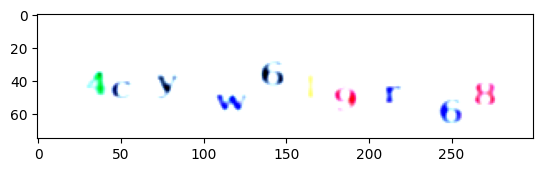

In [15]:
plt.imshow(np.transpose(npimg, (1, 2 ,0)))